# Mownit lab6

In [61]:
using QuadGK
using Polynomials
using Plots

# Zad1

In [62]:
function Legendre(n, pk_1=Polynomial([0,1]), pk_2=Polynomial(1), i=1)
    if n == 0
        return pk_2
    end
    if n == 1
        return pk_1
    end
    
    x = Polynomial([0,1])
    pk = (2i + 1)/(i + 1) * x * pk_1 - (i)/(i+1) * pk_2
    if n == i+1
        return pk
    else
        return Legendre(n, pk, pk_1, i+1)
    end
end

Legendre (generic function with 4 methods)

### Legendre polynomials up to n=5

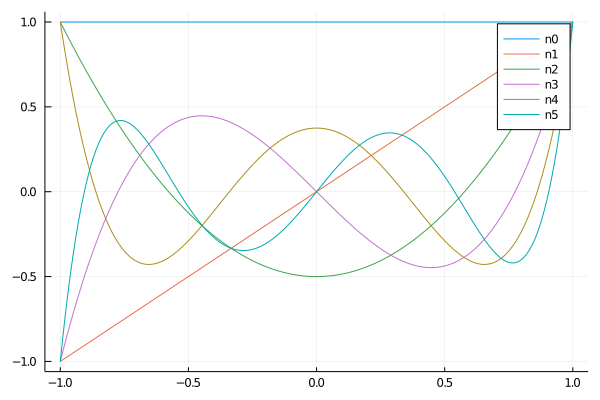

In [63]:
p = plot()
X = -1:0.01:1
for i=0:5
    legendre = Legendre(i)
    Y = [legendre(x) for x in X]
    plot!(X,Y, label=string("n",i))
end
p

### Zeros of Legendre Polynomials are Gaussian Points

In [64]:
for i=2:4
    println("N : ", i)
    println("Legendre polynomial zeros : ", sort(roots(Legendre(i))))
    println("Gaussian points           : ", gauss(Float64,i)[1]) 
end

N : 2
Legendre polynomial zeros : [-0.5773502691896258, 0.5773502691896256]
Gaussian points           : [-0.5773502691896258, 0.5773502691896258]
N : 3
Legendre polynomial zeros : [-0.7745966692414834, 0.0, 0.7745966692414835]
Gaussian points           : [-0.7745966692414834, 0.0, 0.7745966692414834]
N : 4
Legendre polynomial zeros : [-0.8611363115940536, -0.33998104358485653, 0.3399810435848563, 0.8611363115940531]
Gaussian points           : [-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]


Podstawowe Twierdzenie Kwadratur Gaussa:
    Odcięte xi n-punktowej kwadratury Gaussa w [a,b] są zerami wielomianu ortogonalnego dla
    tego samego przedziału [a,b].

# Zad2

In [65]:
function integral_gauss(f, k)
    x, w = gauss(Float64,k)
    return sum(w .* f.(x)) 
end

integral_gauss (generic function with 1 method)

In [76]:
for i=7:1:20
    v = ones(i)
    poly = Polynomial(v)
    println("Stopień : ", i, "  =  ", integral_gauss(poly, 7), ", erorr = ", quadgk(poly,-1,1)[1] - integral_gauss(poly,7))
end
println("Funkcja dla 7 punktów przestaje być dokładna przy 13|14 przedziałach")

Stopień : 7  =  3.3523809523809525, erorr = -4.440892098500626e-16
Stopień : 8  =  3.352380952380953, erorr = -8.881784197001252e-16
Stopień : 9  =  3.5746031746031752, erorr = -8.881784197001252e-16
Stopień : 10  =  3.5746031746031752, erorr = -1.3322676295501878e-15
Stopień : 11  =  3.756421356421357, erorr = -8.881784197001252e-16
Stopień : 12  =  3.756421356421357, erorr = -8.881784197001252e-16
Stopień : 13  =  3.910267510267511, erorr = -1.7763568394002505e-15
Stopień : 14  =  3.910267510267511, erorr = -1.3322676295501878e-15
Stopień : 15  =  4.043415377681113, erorr = 0.0001854659197313424
Stopień : 16  =  4.043415377681113, erorr = 0.0001854659197313424
Stopień : 17  =  4.160370086351798, erorr = 0.0008778160725748663
Stopień : 18  =  4.160370086351798, erorr = 0.0008778160725748663
Stopień : 19  =  4.264082557815937, erorr = 0.0024285025031725027
Stopień : 20  =  4.264082557815937, erorr = 0.002428502503173391
Funkcja dla 7 punktów przestaje być dokładna przy 13|14 przedziała

Twierdzenie o stopniu dokładności kwadratury Gaussa:
    N-punktowa kwadratura ma stopień dokładności 2n - 1

# Zad3

In [67]:
function integral_gauss_normalized(f, a, b, k)
    g(x) = f((a+b)/2 + (b-a)/2 * x)
    return  (b-a)/2 * integral_gauss(g, k)
end

integral_gauss_normalized (generic function with 1 method)

In [68]:
println(Polynomial([1,1,1]), ", (a,b) = ", -2, ":", 2)
println(integral_gauss_normalized(Polynomial([1,1,1]), -2, 2, 10), " == 28/3")
println()
println(Polynomial([0,0,0,1]), ", (a,b) = ", -5, ":", 10)
println(integral_gauss_normalized(Polynomial([0,0,0,1]), -5, 10, 20), " == 2343.75")
println()
f(x) = 2*exp(x)
println("2*exp(x)", ", (a,b) = ", -8, ":", 16)
println(integral_gauss_normalized(f, -8, 16, 10), " == 1.7772e7")

1 + x + x^2, (a,b) = -2:2
9.333333333333334 == 28/3

x^3, (a,b) = -5:10
2343.7500000000014 == 2343.75

2*exp(x), (a,b) = -8:16
1.7772191730876707e7 == 1.7772e7


# Zad4

### quadgk

In [69]:
poly = Polynomial([1,5,10,5,8])
println(poly)
I, E = quadgk(poly, -1, 1)
println(I)

1 + 5*x + 10*x^2 + 5*x^3 + 8*x^4
11.866666666666667


### Integral of normal distribution -Inf : Inf

In [70]:
normal(x) = 1/sqrt(2pi) * exp(-x^2/2)
I, E = quadgk(normal, -Inf, Inf)
print(I)

1.0000000000032583

# Zad5

In [71]:
function trapezoidal_integration(f, a, b, n)
    dx = (b-a)/n
    integral = 0
    for x=a:dx:b
        integral = integral + f(x)
    end
    integral = integral + (f(a) + f(b)) / 2
    integral = integral * dx
    return integral
end

trapezoidal_integration (generic function with 1 method)

In [72]:
f_exp(x) = exp(x)
f_sin(x) = sin(x)

f_sin (generic function with 1 method)

In [73]:
K = 1:1:100

integral_fexp = quadgk(f_exp, 0, 2pi)[1]
errors_exp = []
for k in K
    push!(errors_exp, [])
    errors_exp[k] = abs(integral_fexp - trapezoidal_integration(f_exp, 0, 2pi, k))
end

integral_fsin = quadgk(f_sin, 0, 2pi)[1]
errors_sin = []
for k in K
    push!(errors_sin, [])
    errors_sin[k] = abs(integral_fsin - trapezoidal_integration(f_sin, 0, 2pi, k))
end

### Errors of $\int_{0}^{2pi} exp(x)dx$

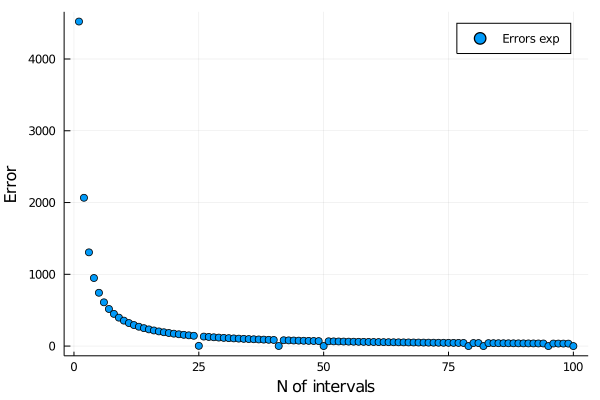

In [74]:
 plot(K, errors_exp, seriestype=:scatter, label="Errors exp", xaxis="N of intervals", yaxis="Error")

### Errors of $\int_{0}^{2pi} sin(x)dx$

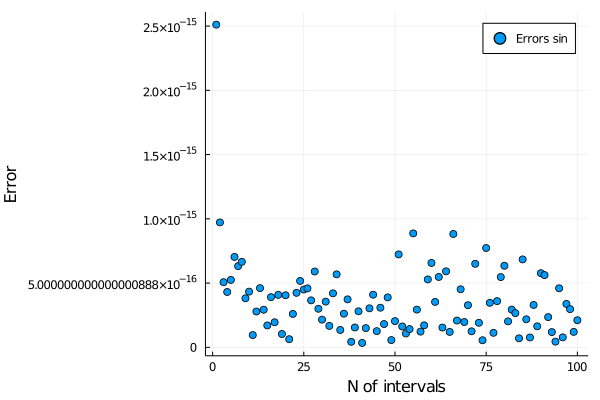

In [75]:
 plot(K, errors_sin, seriestype=:scatter, label="Errors sin", xaxis="N of intervals", yaxis="Error")